In [1]:
#*******************************************************************************************
 #
 #  File Name:  ClimatePy.ipynb
 #
 #  File Description:
 #      This interactive Python notebook, ClimatePy.ipynb, conducts a basic precipitation 
 #      data exploration and analysis of a climate database through the use of SQLAlchemy 
 #      ORM queries, Pandas, and Matplotlib.
 #
 #
 #  Date            Description                             Programmer
 #  ----------      ------------------------------------    ------------------
 #  09/06/2023      Initial Development                     N. James George
 #
 #******************************************************************************************/

import PyFunctions as function
import PyLogFunctions as log_function
import PyLogSubRoutines as log_subroutine
import PySubRoutines as subroutine

import datetime as dt
import pandas as pd

from pprint import pprint

In [2]:
import sqlalchemy

from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

In [4]:
CONSTANT_LOCAL_FILE_NAME \
    = 'ClimatePy.ipynb'

CONSTANT_SQL_LITE_DATABASE_FILE \
    = "sqlite:///Resources/hawaii.sqlite"


log_subroutine \
    .SetLogMode \
        (False)

log_subroutine \
    .SetDebugMode \
        (False)

log_subroutine \
    .SetImageMode \
        (False)


log_subroutine \
    .BeginProgramExecution \
        ('ClimatePy')

# <br> **Section 1: Reflect Tables into SQLAlchemy ORM**

## **1.1: SQLAlchemy Engine**

In [5]:
# This line of code uses SQLAlchemy's function, create_engine, to connect 
# to climate database, hawaii.sqlite, containing precipitation data from
# Honolulu, Hawaii.
engineSQLAlchemyEngineObject \
    = create_engine \
        (CONSTANT_SQL_LITE_DATABASE_FILE)


log_function \
    .DebugReturnObjectWriteObject \
        (engineSQLAlchemyEngineObject)

## **1.2: Database Reflection**

In [6]:
# This line of code sets up the tables in a climate database for reflection
# into classes.
baseSQLAlchemyDeclarativeMetaObject \
    = automap_base()


log_function \
    .DebugReturnObjectWriteObject \
        (baseSQLAlchemyDeclarativeMetaObject)

In [7]:
# This line of code creates an SQLAlchemy inspection object, which delivers 
# runtime information about a wide variety of SQLAlchemy objects.
inspectorSQLAlchemyInspectorObject \
    = inspect \
        (engineSQLAlchemyEngineObject)


log_function \
    .DebugReturnObjectWriteObject \
        (inspectorSQLAlchemyInspectorObject)

## **1.3: Database Table Metadata**

In [8]:
# This line of code reflects the database tables into classes.
baseSQLAlchemyDeclarativeMetaObject \
    .prepare \
        (engineSQLAlchemyEngineObject, 
         reflect = True)

In [9]:
# This line of code views all of the classes that the SQLAlchemy's
# function, automap, found.
baseSQLAlchemyDeclarativeMetaObject \
    .classes \
    .keys()

['measurement', 'station']

In [10]:
# This line of code saves a station reference in an SQLAlchemy 
# Declarative MetaObject.
stationSQLAlchemyDeclarativeMetaObject \
    = baseSQLAlchemyDeclarativeMetaObject \
        .classes \
            .station


log_function \
    .DebugReturnObjectWriteObject \
        (stationSQLAlchemyDeclarativeMetaObject)

In [11]:
# This line of code saves a measurement reference in an SQLAlchemy 
# Declarative MetaObject.
measurementDeclarativeMetaObject \
    = baseSQLAlchemyDeclarativeMetaObject \
        .classes \
            .measurement


log_function \
    .DebugReturnObjectWriteObject \
        (measurementDeclarativeMetaObject)

## **1.4: Create Session**

In [12]:
# This line of code links Python to the database by creating an SQLAlchemy 
# session.
sessionSQLAlchemySessionObject \
    = Session \
        (engineSQLAlchemyEngineObject)


log_function \
    .DebugReturnObjectWriteObject \
        (sessionSQLAlchemySessionObject)

# <br> **Section 2: Exploratory Station Analysis**

## **2.1: Date Ranges**

### **Query Results**

In [13]:
# These lines of code find and display the most recent date 
# and farthest date in the data set.
farthestDatesSQLAlchemyEngineRowObject \
    = sessionSQLAlchemySessionObject \
        .query \
            (measurementDeclarativeMetaObject.date) \
                .order_by \
                    (measurementDeclarativeMetaObject.date.asc()) \
            .first()

mostRecentDatesSQLAlchemyEngineRowObject \
    = sessionSQLAlchemySessionObject \
        .query \
            (measurementDeclarativeMetaObject.date) \
                .order_by \
                    (measurementDeclarativeMetaObject.date.desc()) \
            .first()


firstDateStringVariable \
    = farthestDatesSQLAlchemyEngineRowObject[0]

lastDateStringVariable \
    = mostRecentDatesSQLAlchemyEngineRowObject[0]

### **Display Date Range**

In [14]:
log_subroutine \
    .PrintAndLogWriteText \
        ('\033[1m' \
         + f'This data set extends from {firstDateStringVariable} ' \
         + f'to {lastDateStringVariable}.' \
         + '\033[0m')

This data set extends from 2010-01-01 to 2017-08-23.


### **Display Date One Year Prior to Last Date**

In [15]:
# This line of code finds and displays the date one year prior 
# to the most recent date.
oneYearPriorToLastDateStringVariable \
    = function \
        .ReturnDateFromOneYearPriorAsString \
            (lastDateStringVariable)

log_subroutine \
    .PrintAndLogWriteText \
        ('\033[1m' \
         + 'The date one year prior to the most recent date in the data set is ' \
         + f'{oneYearPriorToLastDateStringVariable}.' \
         + '\033[0m')

The date one year prior to the most recent date in the data set is 2016-08-23.


## **2.2: Total Number of Stations**

### **Query Results**

In [16]:
# This line of code is a query that calculates the total number stations 
# in the dataset.
totalNumberOfStationsInDataSetIntegerVariable \
    = sessionSQLAlchemySessionObject \
        .query \
            (stationSQLAlchemyDeclarativeMetaObject) \
        .group_by \
            (stationSQLAlchemyDeclarativeMetaObject.station) \
        .count()

### **Display Total Number of Stations**

In [17]:
log_subroutine \
    .PrintAndLogWriteText \
        ('\033[1m' \
         + 'The total number of stations in the dataset is ' \
         + '{:,}.' \
                .format \
                     (totalNumberOfStationsInDataSetIntegerVariable) \
         + '\033[0m')

The total number of stations in the dataset is 9.


## **2.3: Most Active Station IDs**

### **Initialize Date Lists**

In [18]:
keyStringList \
    = ['2010',
       '2011',
       '2012',
       '2013',
       '2014',
       '2015',
       '2016',
       '2017*']

firstDateStringList \
    = ['2010-01-01',
       '2011-01-01',
       '2012-01-01',
       '2013-01-01',
       '2014-01-01',
       '2015-01-01',
       '2016-01-01',
       '2017-01-01']

lastDateStringList \
    = ['2010-12-31',
       '2011-12-31',
       '2012-12-31',
       '2013-12-31',
       '2014-12-31',
       '2015-12-31',
       '2016-12-31',
       '2017-08-23']

### **Query Results**

In [19]:
mostActiveStationIDDictionary \
    = {}


for index, value in enumerate(keyStringList): 

    mostActiveStationsSQLAlchemyEngineRowObjectList \
        = sessionSQLAlchemySessionObject \
            .query \
                (measurementDeclarativeMetaObject.station, 
                 func.count(measurementDeclarativeMetaObject.station)) \
            .group_by \
                (measurementDeclarativeMetaObject.station) \
            .order_by \
                (func.count(measurementDeclarativeMetaObject.station).desc()) \
            .filter \
                (measurementDeclarativeMetaObject.date \
                    >= firstDateStringList[index]) \
            .filter \
                (measurementDeclarativeMetaObject.date \
                    <= lastDateStringList[index]) \
            .all()
    
    tempObjectList \
        = [mostActiveStationsSQLAlchemyEngineRowObjectList[0][0],
           mostActiveStationsSQLAlchemyEngineRowObjectList[0][1]]

    mostActiveStationIDDictionary[value] \
        = tempObjectList
    
    
    log_function \
        .DebugReturnObjectWriteObject \
            (mostActiveStationsSQLAlchemyEngineRowObjectList)

### **Save Query Results to DataFrame**

In [20]:
mostActiveStationsCountDataFrame \
    = pd.DataFrame.from_dict \
        (mostActiveStationIDDictionary, 
         orient = 'index', 
         columns = ['Station ID', 'TOBS'])

mostActiveStationsCountDataFrame \
    .index \
    .name \
        = 'Year'


log_function \
    .DebugReturnObjectWriteObject \
        (mostActiveStationsCountDataFrame)

### **Display Most Active Station IDs By Year**

In [21]:
captionString \
    = 'Table 2.3: Most Active Station IDs and TOBS By Year'

currentStylerObject \
    = function \
        .ReturnStylerObjectStandardFormat \
            (mostActiveStationsCountDataFrame, 
             captionString,
             hideFlagBooleanParameter = False)

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,Station ID,TOBS
Year,,
2010,USC00519281,364
2011,USC00519523,362
2012,USC00519281,366
2013,USC00519397,365
2014,USC00519281,365
2015,USC00519397,364
2016,USC00519397,366
2017*,USC00519397,230


## **2.4: Minimum, Maximum, and Average Temperatures**

### **Initialize Temperature Lists**

In [22]:
minimumTemperatureFloatList \
    = []

maximumTemperatureFloatList \
    = []

meanTemperatureFloatList \
    = []

### **Query Results**

In [23]:
for index, value in enumerate(keyStringList): 
    
    minimumTemperatureFloatVariable \
        = sessionSQLAlchemySessionObject \
            .query \
                (func.min(measurementDeclarativeMetaObject.tobs)) \
            .filter \
                (measurementDeclarativeMetaObject.date \
                    >= firstDateStringList[index]) \
            .filter \
                (measurementDeclarativeMetaObject.date \
                    <= lastDateStringList[index]) \
            .filter \
                (measurementDeclarativeMetaObject.station \
                    == mostActiveStationIDDictionary[value][0]) \
            .first()[0]
    
    maximumTemperatureFloatVariable \
        = sessionSQLAlchemySessionObject \
            .query \
                (func.max(measurementDeclarativeMetaObject.tobs)) \
            .filter \
                (measurementDeclarativeMetaObject.date \
                    >= firstDateStringList[index]) \
            .filter \
                (measurementDeclarativeMetaObject.date \
                    <= lastDateStringList[index]) \
            .filter \
                (measurementDeclarativeMetaObject.station \
                    == mostActiveStationIDDictionary[value][0]) \
            .first()[0]
    
    meanTemperatureFloatVariable \
        = sessionSQLAlchemySessionObject \
            .query \
                (func.avg(measurementDeclarativeMetaObject.tobs)) \
            .filter \
                (measurementDeclarativeMetaObject.date \
                    >= firstDateStringList[index]) \
            .filter \
                (measurementDeclarativeMetaObject.date \
                    <= lastDateStringList[index]) \
            .filter \
                (measurementDeclarativeMetaObject.station \
                    == mostActiveStationIDDictionary[value][0]) \
            .first()[0]
    
    minimumTemperatureFloatList \
        .append \
            (round \
                (minimumTemperatureFloatVariable, 1))
    
    maximumTemperatureFloatList \
        .append \
            (round \
                (maximumTemperatureFloatVariable, 1))

    meanTemperatureFloatList \
        .append \
            (round \
                (meanTemperatureFloatVariable, 1))

### **Save Query Results to DataFrame**

In [24]:
temperatureDataFrame \
    = pd.DataFrame \
        (list \
            (zip \
                (minimumTemperatureFloatList, 
                 maximumTemperatureFloatList, 
                 meanTemperatureFloatList)),
         columns = ['Minimum', 
                    'Maximum', 
                    'Mean'], 
         index = list \
                    (mostActiveStationIDDictionary.keys()))


log_function \
    .DebugReturnObjectWriteObject \
        (temperatureDataFrame)

### **Display Minimum, Maximum, and Average Temperatures By Year**

In [25]:
captionString \
    = 'Table 2.4: Minimum, Maximum, and Average Temperatures By Year'

currentStylerObject \
    = function \
        .ReturnStylerObjectStandardFormat \
            (temperatureDataFrame, 
             captionString,
             hideFlagBooleanParameter = False) \
                .format \
                    ({'Minimum': '{:,.1f} °F',
                      'Maximum': '{:,.1f} °F',
                      'Mean': '{:,.1f} °F'})

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,Minimum,Maximum,Mean
2010,58.0 °F,82.0 °F,71.3 °F
2011,58.0 °F,84.0 °F,74.3 °F
2012,60.0 °F,82.0 °F,71.2 °F
2013,58.0 °F,84.0 °F,74.0 °F
2014,57.0 °F,81.0 °F,70.8 °F
2015,58.0 °F,84.0 °F,75.3 °F
2016,61.0 °F,82.0 °F,74.5 °F
2017*,60.0 °F,87.0 °F,74.9 °F


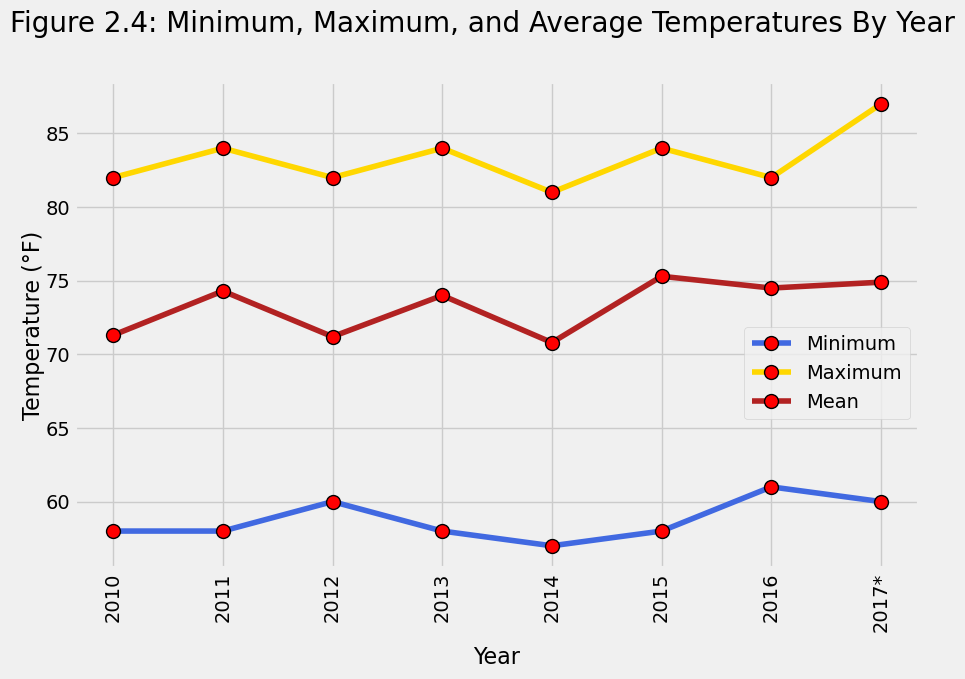

In [26]:
subroutine \
    .DisplayMultiLineGraphFromDataFrame \
        (temperatureDataFrame,
         ['royalblue', 'gold','firebrick'],
         'Figure 2.4: Minimum, Maximum, and Average Temperatures By Year',
         'Year',
         'Temperature (°F)',
         legendFlagBoolean = True,
         markerSizeInteger = 10,
         legendXCoordinateFloat = 1.0,
         legendYCoordinateFloat = 0.4)

# <br> **Section 3: Exploratory Temperature Observations (TOBs) Analysis**

## **3.1: Query Results**

In [27]:
tobsDataFrameList \
    = []

for index, value in enumerate(keyStringList): 

    resultsSQLAlchemyEngineRowObjectList \
        = sessionSQLAlchemySessionObject \
            .query \
                (measurementDeclarativeMetaObject.date, 
                 measurementDeclarativeMetaObject.tobs) \
            .filter \
                (measurementDeclarativeMetaObject.date \
                    >= firstDateStringList[index]) \
            .filter \
                (measurementDeclarativeMetaObject.date \
                    <= lastDateStringList[index]) \
            .filter \
                (measurementDeclarativeMetaObject.station \
                    == mostActiveStationIDDictionary[value][0]) \
            .all()
    
    tempDataFrame \
        = pd.DataFrame \
            (resultsSQLAlchemyEngineRowObjectList,
             columns = ['date','tobs'])
        

    tempDataFrame \
        .dropna \
            (axis = 0, 
             how = 'any',
             inplace = True)
    
    tempDataFrame \
        .set_index \
            ('date',  
             drop = True, 
             append = False,
             inplace = True,
             verify_integrity = False)

    tempDataFrame \
        .sort_values \
            (by = 'date', 
             axis = 0,
             inplace = True)
    
    
    tobsDataFrameList \
        .append \
            (tempDataFrame)
    
    
    log_function \
        .DebugReturnObjectWriteObject \
            (resultsSQLAlchemyEngineRowObjectList)
    
    
log_function \
    .DebugReturnObjectWriteObject \
        (tobsDataFrameList)

## **3.2: Temperature Observations (TOBs) (2010)**

### **Histogram**

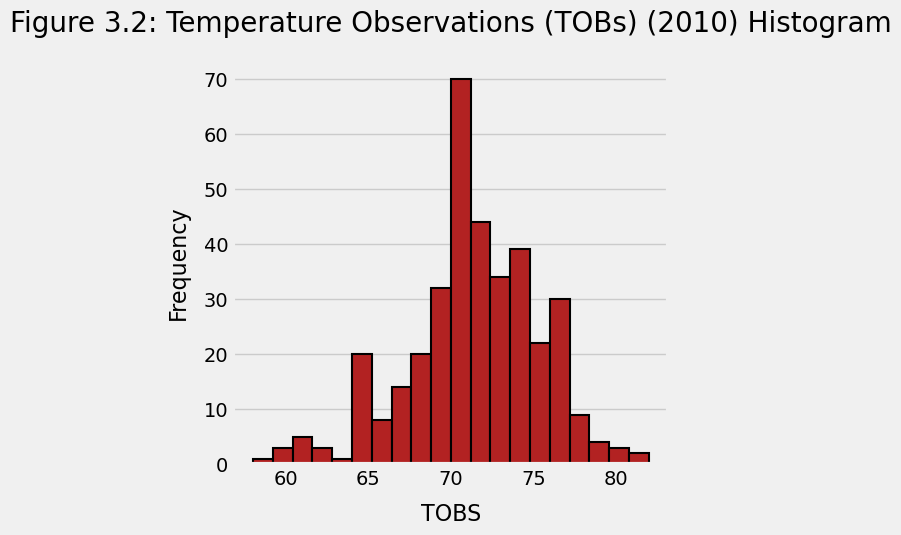

In [28]:
tobsDataFrameList[0] \
    .rename \
        ({'tobs': '2010'}, 
         axis = 1, 
         inplace = True)

subroutine \
    .DisplayHistogramFromSeries \
        (tobsDataFrameList[0] \
            ['2010'],
         'Figure 3.2: Temperature Observations (TOBs) (2010) Histogram',
         'TOBS',
         'Frequency', 
         binsIntegerParameter = 20,
         colorStringParameter = 'firebrick',
         figureWidthFloat = 5.0,
         figureHeightFloat = 5.0)  

### **Summary Statistics**

In [29]:
captionString \
    = 'Table 3.2: Temperature Observations (TOBs) (2010) Summary Statistics'

currentStylerObject \
    = function \
        .ReturnFormattedStatisticsDataFrameFromSeries \
            (tobsDataFrameList[0] \
                 ['2010'],
             captionString,
             columnNameString = 'tobs')

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,tobs
Mean,71.3049
Median,72.0000
Mode,72.0000
Variance,16.1299
Std Dev,4.0162
SEM,0.2105
Minimum,58.00
25%,69.00
50%,72.00
75%,74.00


## **3.3: Temperature Observations (TOBs) (2011)**

 ### **Histogram**

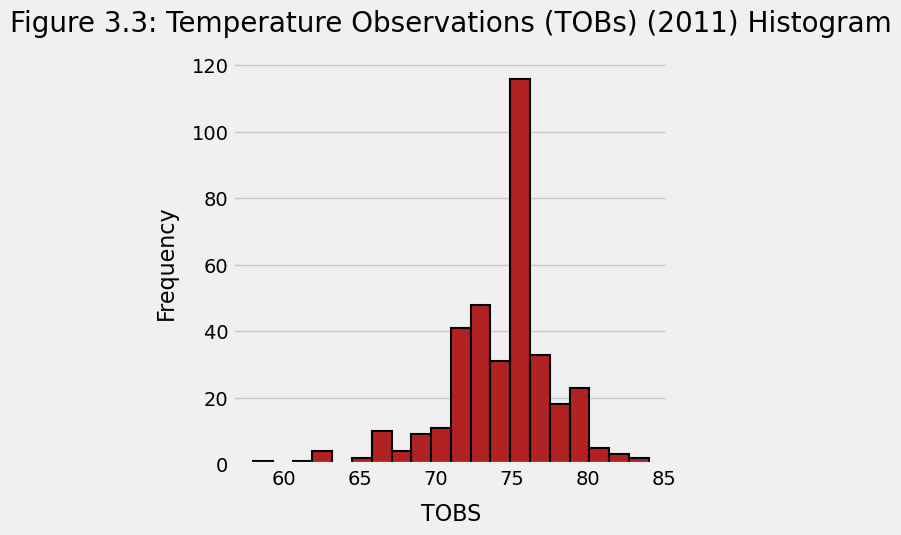

In [30]:
tobsDataFrameList[1] \
    .rename \
        ({'tobs': '2011'}, 
         axis = 1, 
         inplace = True)

subroutine \
    .DisplayHistogramFromSeries \
        (tobsDataFrameList[1] \
            ['2011'],
         'Figure 3.3: Temperature Observations (TOBs) (2011) Histogram',
         'TOBS',
         'Frequency', 
         binsIntegerParameter = 20,
         colorStringParameter = 'firebrick',
         figureWidthFloat = 5.0,
         figureHeightFloat = 5.0)  

### **Summary Statistics**

In [31]:
captionString \
    = 'Table 3.3: Temperature Observations (TOBs) (2011) Summary Statistics'

currentStylerObject \
    = function \
        .ReturnFormattedStatisticsDataFrameFromSeries \
            (tobsDataFrameList[1] \
                 ['2011'],
             captionString,
             columnNameString = 'tobs')

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,tobs
Mean,74.3425
Median,75.0000
Mode,76.0000
Variance,12.8352
Std Dev,3.5826
SEM,0.1883
Minimum,58.00
25%,73.00
50%,75.00
75%,76.00


## **3.4: Temperature Observations (TOBs) (2012)**

### **Histogram**

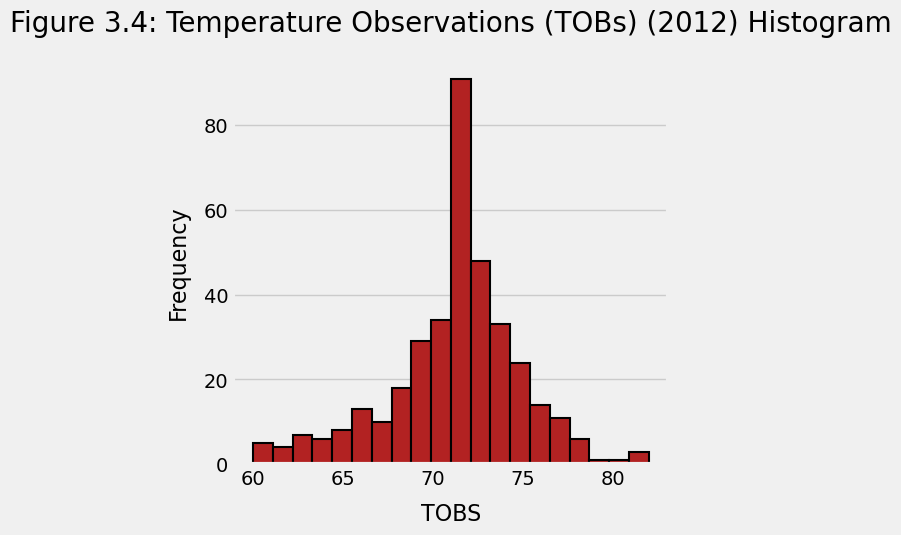

In [32]:
tobsDataFrameList[2] \
    .rename \
        ({'tobs': '2012'}, 
         axis = 1, 
         inplace = True)

subroutine \
    .DisplayHistogramFromSeries \
        (tobsDataFrameList[2] \
            ['2012'],
         'Figure 3.4: Temperature Observations (TOBs) (2012) Histogram',
         'TOBS',
         'Frequency', 
         binsIntegerParameter = 20,
         colorStringParameter = 'firebrick',
         figureWidthFloat = 5.0,
         figureHeightFloat = 5.0)  

### **Summary Statistics**

In [33]:
captionString \
    = 'Table 3.4: Temperature Observations (TOBs) (2012) Summary Statistics'

currentStylerObject \
    = function \
        .ReturnFormattedStatisticsDataFrameFromSeries \
            (tobsDataFrameList[2] \
                 ['2012'],
             captionString,
             columnNameString = 'tobs')

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,tobs
Mean,71.2186
Median,72.0000
Mode,73.0000
Variance,13.9740
Std Dev,3.7382
SEM,0.1954
Minimum,60.00
25%,69.00
50%,72.00
75%,74.00


## **3.5: Temperature Observations (TOBs) (2013)**

### **Histogram**

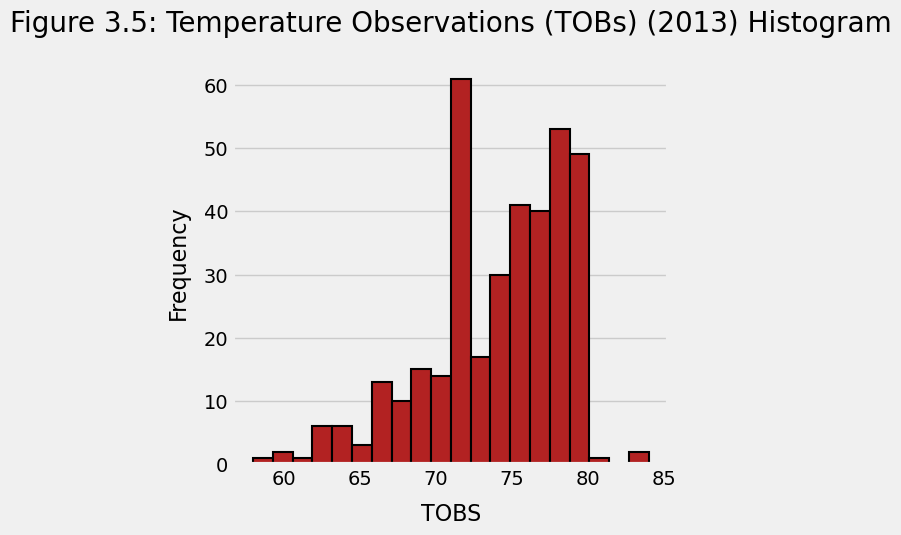

In [34]:
tobsDataFrameList[3] \
    .rename \
        ({'tobs': '2013'}, 
         axis = 1, 
         inplace = True)

subroutine \
    .DisplayHistogramFromSeries \
        (tobsDataFrameList[3] \
            ['2013'],
         'Figure 3.5: Temperature Observations (TOBs) (2013) Histogram',
         'TOBS',
         'Frequency', 
         binsIntegerParameter = 20,
         colorStringParameter = 'firebrick',
         figureWidthFloat = 5.0,
         figureHeightFloat = 5.0) 

### **Summary Statistics**

In [35]:
captionString \
    = 'Table 3.5: Temperature Observations (TOBs) (2013) Summary Statistics'

currentStylerObject \
    = function \
        .ReturnFormattedStatisticsDataFrameFromSeries \
            (tobsDataFrameList[3] \
                 ['2013'],
             captionString,
             columnNameString = 'tobs')

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,tobs
Mean,74.0000
Median,75.0000
Mode,78.0000
Variance,20.4011
Std Dev,4.5168
SEM,0.2364
Minimum,58.00
25%,71.00
50%,75.00
75%,78.00


## **3.6: Temperature Observations (TOBs) (2014)**

### **Histogram**

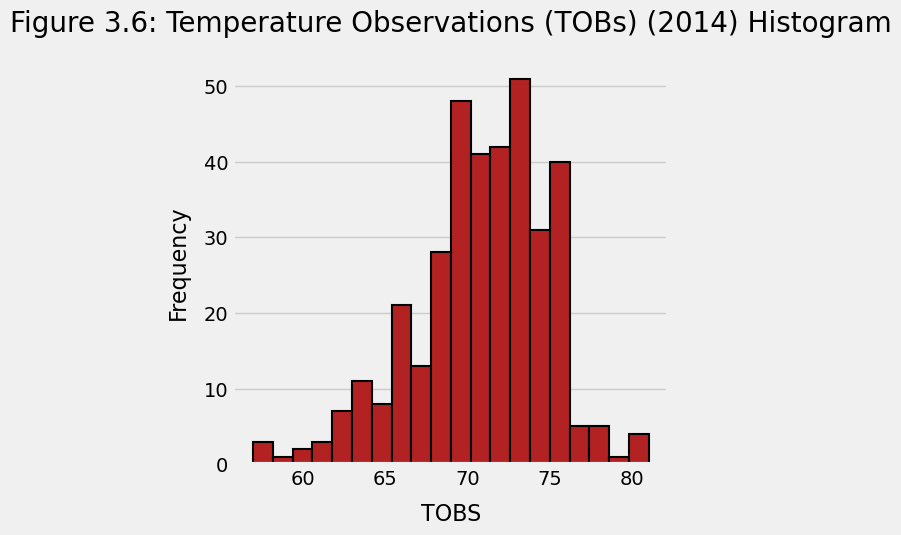

In [36]:
tobsDataFrameList[4] \
    .rename \
        ({'tobs': '2014'}, 
         axis = 1, 
         inplace = True)

subroutine \
    .DisplayHistogramFromSeries \
        (tobsDataFrameList[4] \
            ['2014'],
         'Figure 3.6: Temperature Observations (TOBs) (2014) Histogram',
         'TOBS',
         'Frequency', 
         binsIntegerParameter = 20,
         colorStringParameter = 'firebrick',
         figureWidthFloat = 5.0,
         figureHeightFloat = 5.0) 

### **Summary Statistics**

In [37]:
captionString \
    = 'Table 3.6: Temperature Observations (TOBs) (2014) Summary Statistics'

currentStylerObject \
    = function \
        .ReturnFormattedStatisticsDataFrameFromSeries \
            (tobsDataFrameList[4] \
                 ['2014'],
             captionString,
             columnNameString = 'tobs')

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,tobs
Mean,70.7589
Median,71.0000
Mode,73.0000
Variance,16.1560
Std Dev,4.0195
SEM,0.2104
Minimum,57.00
25%,68.00
50%,71.00
75%,73.00


## **3.7: Temperature Observations (TOBs) (2015)**

### **Histogram**

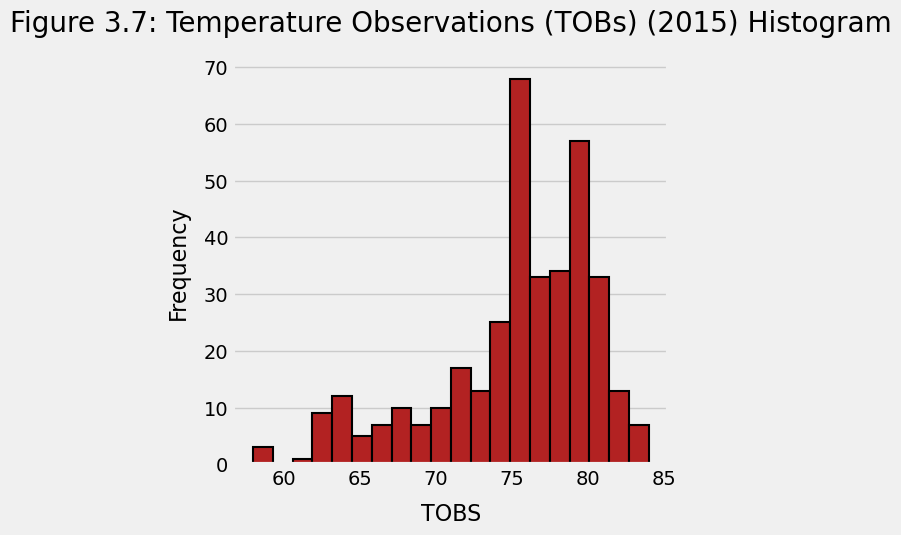

In [38]:
tobsDataFrameList[5] \
    .rename \
        ({'tobs': '2015'}, 
         axis = 1, 
         inplace = True)

subroutine \
    .DisplayHistogramFromSeries \
        (tobsDataFrameList[5] \
            ['2015'],
         'Figure 3.7: Temperature Observations (TOBs) (2015) Histogram',
         'TOBS',
         'Frequency', 
         binsIntegerParameter = 20,
         colorStringParameter = 'firebrick',
         figureWidthFloat = 5.0,
         figureHeightFloat = 5.0) 

### **Summary Statistics**

In [39]:
captionString \
    = 'Table 3.7: Temperature Observations (TOBs) (2015) Summary Statistics'

currentStylerObject \
    = function \
        .ReturnFormattedStatisticsDataFrameFromSeries \
            (tobsDataFrameList[5] \
                 ['2015'],
             captionString,
             columnNameString = 'tobs')

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,tobs
Mean,75.3104
Median,76.0000
Mode,76.0000
Variance,27.4874
Std Dev,5.2428
SEM,0.2748
Minimum,58.00
25%,73.00
50%,76.00
75%,79.00


## **3.8: Temperature Observations (TOBs) (2016)**

### **Histogram**

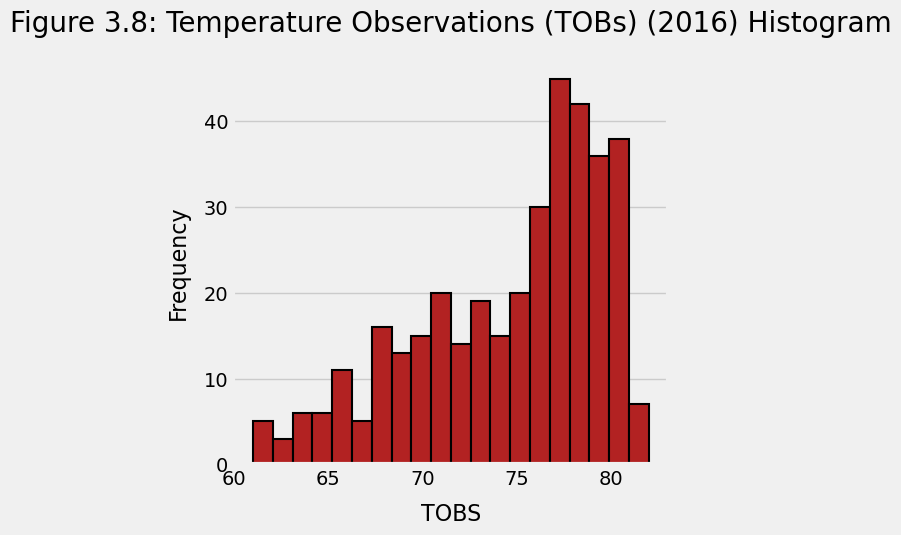

In [40]:
tobsDataFrameList[6] \
    .rename \
        ({'tobs': '2016'}, 
         axis = 1, 
         inplace = True)

subroutine \
    .DisplayHistogramFromSeries \
        (tobsDataFrameList[6] \
            ['2016'],
         'Figure 3.8: Temperature Observations (TOBs) (2016) Histogram',
         'TOBS',
         'Frequency', 
         binsIntegerParameter = 20,
         colorStringParameter = 'firebrick',
         figureWidthFloat = 5.0,
         figureHeightFloat = 5.0) 

### **Summary Statistics**

In [41]:
captionString \
    = 'Table 3.8: Temperature Observations (TOBs) (2016) Summary Statistics'

currentStylerObject \
    = function \
        .ReturnFormattedStatisticsDataFrameFromSeries \
            (tobsDataFrameList[6] \
                 ['2016'],
             captionString,
             columnNameString = 'tobs')

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,tobs
Mean,74.4973
Median,76.0000
Mode,77.0000
Variance,22.7164
Std Dev,4.7662
SEM,0.2491
Minimum,61.00
25%,71.00
50%,76.00
75%,78.00


## **3.9: Temperature Observations (TOBs) (2017 - 8 Months)**

### **Histogram**

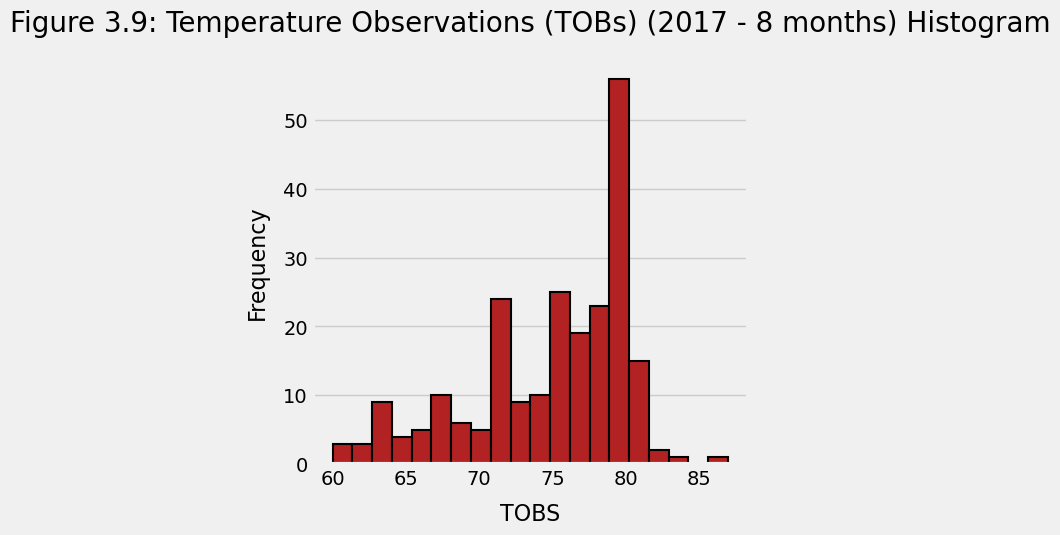

In [42]:
tobsDataFrameList[7] \
    .rename \
        ({'tobs': '2017*'}, 
         axis = 1, 
         inplace = True)

subroutine \
    .DisplayHistogramFromSeries \
        (tobsDataFrameList[7] \
            ['2017*'],
         'Figure 3.9: Temperature Observations (TOBs) (2017 - 8 months) Histogram',
         'TOBS',
         'Frequency', 
         binsIntegerParameter = 20,
         colorStringParameter = 'firebrick',
         figureWidthFloat = 5.0,
         figureHeightFloat = 5.0) 

### **Summary Statistics**

In [43]:
captionString \
    = 'Table 3.9: Temperature Observations (TOBs) (2017 - 8 Months) Summary Statistics'

currentStylerObject \
    = function \
        .ReturnFormattedStatisticsDataFrameFromSeries \
            (tobsDataFrameList[7] \
                 ['2017*'],
             captionString,
             columnNameString = 'tobs')

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,tobs
Mean,74.9261
Median,77.0000
Mode,80.0000
Variance,29.2041
Std Dev,5.4041
SEM,0.3563
Minimum,60.00
25%,72.00
50%,77.00
75%,79.00


## **3.10: Temperature Observations (TOBs) (2010-2017)**

### **Histogram**

[0.0, 87.0]


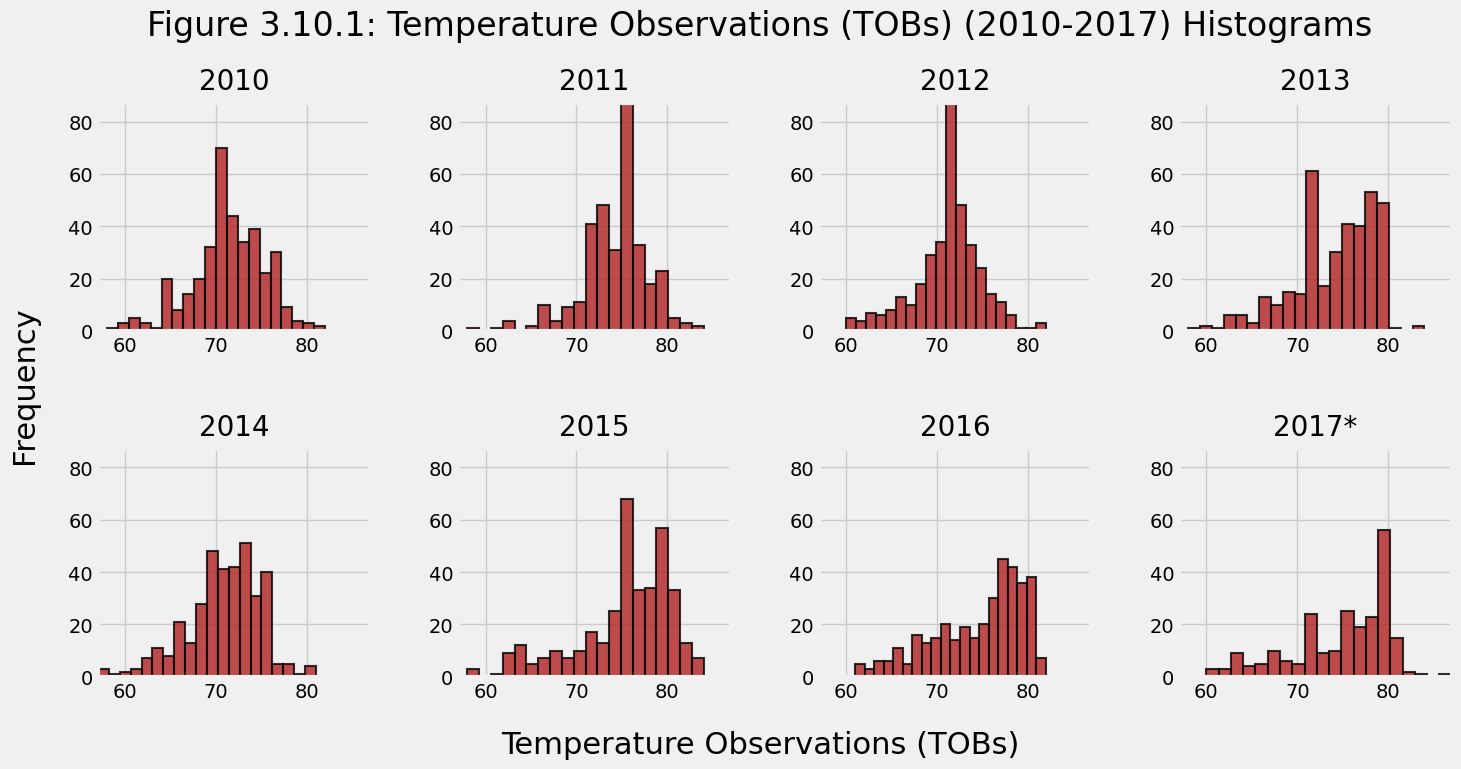

In [44]:
subroutine \
    .DisplayTwoByFourHistogramsFromDataFrameList \
        (tobsDataFrameList,
         keyStringList,
         figureTitleString \
             = 'Figure 3.10.1: Temperature Observations (TOBs) (2010-2017) Histograms',
         figureTitleYPadFloat = 1.0,
         figureXLabelPadFloat = 0.0,
         figureYLabelPadFloat = 0.0,
         figureXLabelString = 'Temperature Observations (TOBs)',
         figureYLabelString = 'Frequency',
         plotTitleStringList = keyStringList,
         normalizeXAxisBoolean = True,
         normalizeYAxisBoolean = True,
         normalizeYAxisHighestValueCountBoolean = True,
         figSizeFloatTuple \
             = (15.0, 7.5))

### **Box Plot**

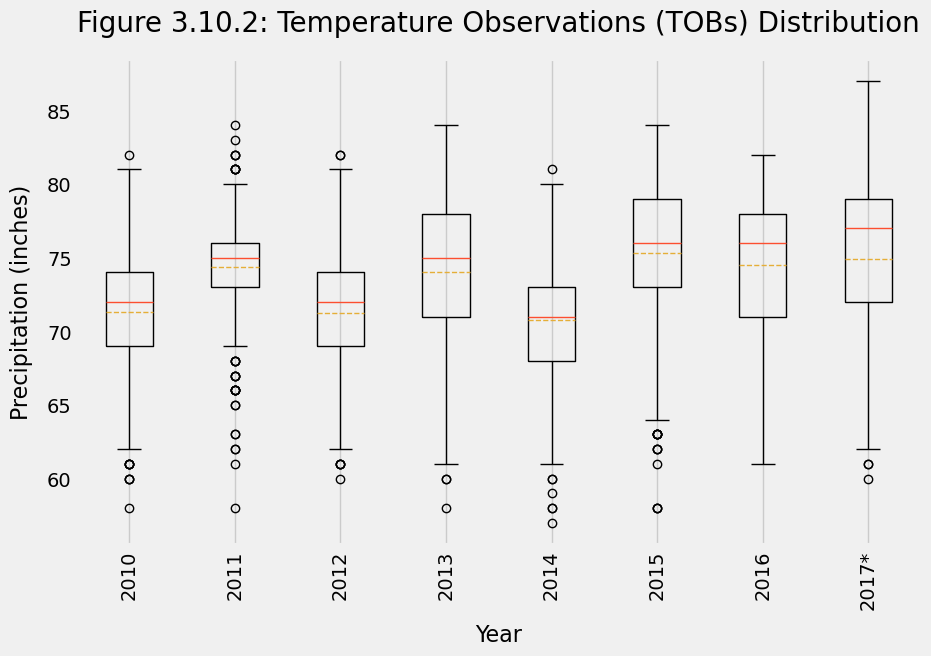

In [45]:
tobsSeriesList \
    = []

for index, dataFrameObject in enumerate(tobsDataFrameList):
    
    tobsSeriesList \
        .append \
            (dataFrameObject \
                 [keyStringList[index]])

subroutine \
    .DisplayMatplotlibBoxPlotFromSeriesList \
        (tobsSeriesList,
         keyStringList,
         'Year',
         'Precipitation (inches)',
         'Figure 3.10.2: Temperature Observations (TOBs) Distribution',
         xTicksRotationFloat = 90.0)

### **Summary Statistics**

In [46]:
captionString \
    = 'Table 3.10.1: Temperature Observations (TOBs) (2010-2017) Summary Statistics'

currentStylerObject \
    = function \
        .ReturnFormattedStatisticsDataFrameFromDataFrameList \
            (tobsDataFrameList,
             keyStringList,
             captionString)

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,2010,2011,2012,2013,2014,2015,2016,2017*
Mean,71.3049,74.3425,71.2186,74.0000,70.7589,75.3104,74.4973,74.9261
Median,72.0000,75.0000,72.0000,75.0000,71.0000,76.0000,76.0000,77.0000
Mode,72.0000,76.0000,73.0000,78.0000,73.0000,76.0000,77.0000,80.0000
Variance,16.1299,12.8352,13.9740,20.4011,16.1560,27.4874,22.7164,29.2041
Std Dev,4.0162,3.5826,3.7382,4.5168,4.0195,5.2428,4.7662,5.4041
SEM,0.2105,0.1883,0.1954,0.2364,0.2104,0.2748,0.2491,0.3563
Minimum,58.00,58.00,60.00,58.00,57.00,58.00,61.00,60.00
25%,69.00,73.00,69.00,71.00,68.00,73.00,71.00,72.00
50%,72.00,75.00,72.00,75.00,71.00,76.00,76.00,77.00
75%,74.00,76.00,74.00,78.00,73.00,79.00,78.00,79.00


### **Correlation Matrix**

In [47]:
normalizedTobsDataFrame \
    = function \
        .ReturnNormalizedDataFrameFromIndex \
            (tobsDataFrameList,
             '2017*')

captionString \
    = 'Table 3.10.2: Temperature Observations (TOBs) (2010-2016) Correlation Matrix'

currentStylerObject \
    = function \
        .ReturnCorrelationTableStandardFormat \
            (normalizedTobsDataFrame,
             captionString)

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,2010,2011,2012,2013,2014,2015,2016
2010,1.000000,0.382295,0.233165,0.447710,0.304024,0.428559,0.475490
2011,0.382295,1.000000,0.345803,0.472453,0.388403,0.516285,0.569859
2012,0.233165,0.345803,1.000000,0.322724,0.330466,0.427456,0.410640
2013,0.447710,0.472453,0.322724,1.000000,0.519561,0.638869,0.661093
2014,0.304024,0.388403,0.330466,0.519561,1.000000,0.546042,0.587159
2015,0.428559,0.516285,0.427456,0.638869,0.546042,1.000000,0.715458
2016,0.475490,0.569859,0.410640,0.661093,0.587159,0.715458,1.000000


# <br> **Section 4: Exploratory Precipitation Analysis**

## **4.1: Query Results**

### **Query Results**

In [48]:
precipitationDataFrameList \
    = []

totalPrecipitationDictionary \
    = {'2010': 0.0,
       '2011': 0.0,
       '2012': 0.0,
       '2013': 0.0,
       '2014': 0.0,
       '2015': 0.0,
       '2016': 0.0,
       '2017*': 0.0}

In [49]:
for index, value in enumerate(keyStringList):
    
    resultsSQLAlchemyEngineRowObjectList \
        = sessionSQLAlchemySessionObject \
            .query \
                (measurementDeclarativeMetaObject \
                    .date, 
                 measurementDeclarativeMetaObject \
                    .prcp) \
            .filter \
                (measurementDeclarativeMetaObject.date \
                    >= firstDateStringList[index]) \
            .filter \
                (measurementDeclarativeMetaObject.date \
                    <= lastDateStringList[index]) \
            .filter \
                (measurementDeclarativeMetaObject.station \
                    == mostActiveStationIDDictionary[value][0]) \
            .all()
    
    tempDataFrame \
        = pd.DataFrame \
            (resultsSQLAlchemyEngineRowObjectList,
             columns = ['date', 
                        'precipitation'])
    
    
    tempDataFrame \
        .dropna \
            (axis = 0, 
             how = 'any',
             inplace = True)
    
    tempDataFrame \
        .set_index \
            ('date',  
             drop = True, 
             append = False,
             inplace = True,
             verify_integrity = False)

    tempDataFrame \
        .sort_values \
            (by = 'date', 
             axis = 0,
             inplace = True)

    
    totalPrecipitationDictionary[value] \
        = round \
            (tempDataFrame['precipitation'].sum(), 2)
    
    
    precipitationDataFrameList \
        .append \
            (tempDataFrame)
    
    
    log_function \
        .DebugReturnObjectWriteObject \
            (resultsSQLAlchemyEngineRowObjectList)


log_function \
    .DebugReturnObjectWriteObject \
        (precipitationDataFrameList)

## **4.2: Precipitation (2010)**

### **Display Precipitation vs. Time**

<Figure size 970.813x600 with 0 Axes>

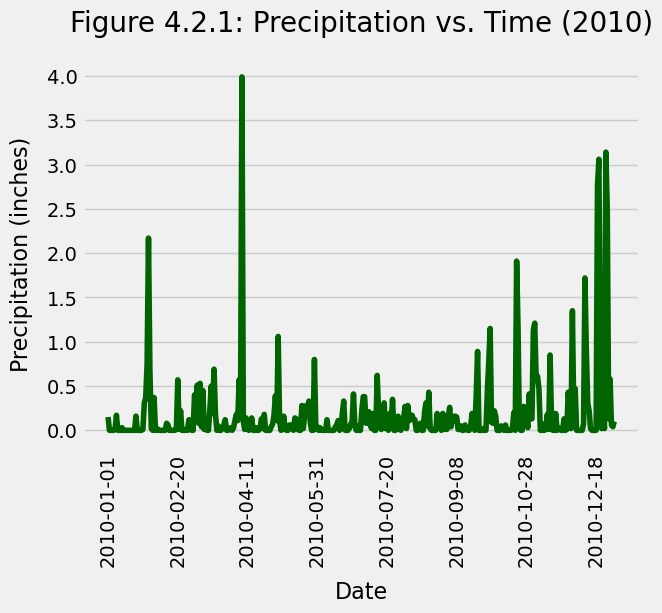

In [50]:
subroutine \
    .DisplayPlotFromDataFrame \
        (precipitationDataFrameList[0],
         colorString = 'darkgreen',
         captionString = 'Figure 4.2.1: Precipitation vs. Time (2010)',
         xLabelString = 'Date',
         yLabelString = 'Precipitation (inches)',
         figureWidthFloat = 5.0,
         figureHeightFloat = 5.0)

### **Histogram**

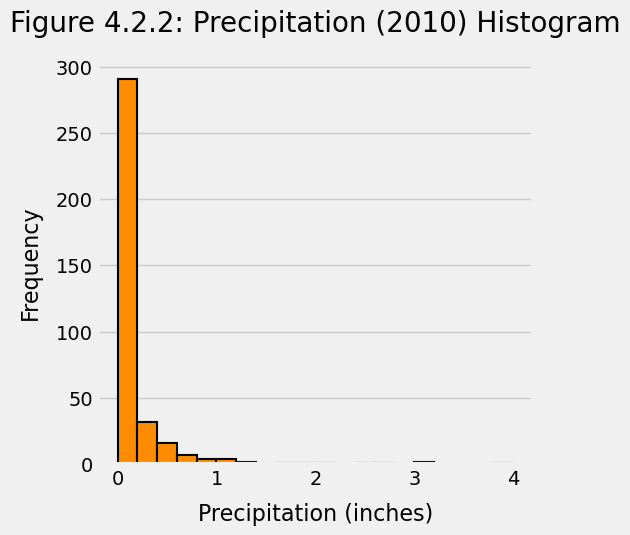

In [51]:
if 'precipitation' in precipitationDataFrameList[0].columns:
    
    subroutine \
        .DisplayHistogramFromSeries \
            (precipitationDataFrameList[0] \
                 ['precipitation'],
             'Figure 4.2.2: Precipitation (2010) Histogram',
             'Precipitation (inches)',
             'Frequency',
             colorStringParameter = 'darkorange',
             binsIntegerParameter = 20,
             figureWidthFloat = 5.0,
             figureHeightFloat = 5.0)
    
else:
    
    subroutine \
        .DisplayHistogramFromSeries \
            (precipitationDataFrameList[0] \
                 ['2010'],
             'Figure 4.2.2: Precipitation (2010) Histogram',
             'Precipitation (inches)',
             'Frequency',
             colorStringParameter = 'darkorange',
             binsIntegerParameter = 20,
             figureWidthFloat = 5.0,
             figureHeightFloat = 5.0)

### **Summary Statistics**

In [52]:
captionString \
    = 'Table 4.2: Precipitation (2010) Summary Statistics'

if 'precipitation' in precipitationDataFrameList[0].columns:

    precipitationDataFrameList[0] \
        .rename \
            ({'precipitation': '2010'}, 
             axis = 1, 
             inplace = True)

currentStylerObject \
    = function \
        .ReturnFormattedStatisticsDataFrameFromSeries \
            (precipitationDataFrameList[0] \
                 ['2010'],
             captionString,
             columnNameString = 'precipitation')

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,precipitation
Mean,0.1805
Median,0.0250
Mode,0.0000
Variance,0.1962
Std Dev,0.4429
SEM,0.0232
Minimum,0.00
25%,0.00
50%,0.03
75%,0.16


## **4.3: Precipitation (2011)**

### **Display Precipitation vs. Time**

<Figure size 970.813x600 with 0 Axes>

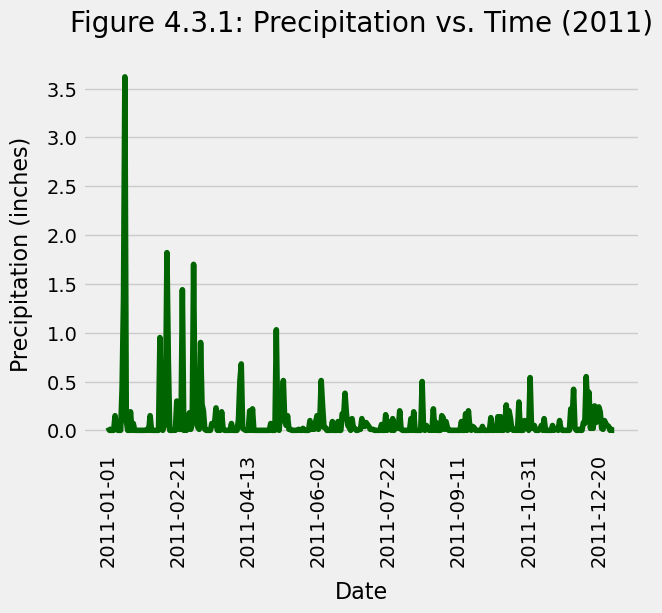

In [53]:
subroutine \
    .DisplayPlotFromDataFrame \
        (precipitationDataFrameList[1],
         colorString = 'darkgreen',
         captionString = 'Figure 4.3.1: Precipitation vs. Time (2011)',
         xLabelString = 'Date',
         yLabelString = 'Precipitation (inches)',
         figureWidthFloat = 5.0,
         figureHeightFloat = 5.0)

### **Histogram**

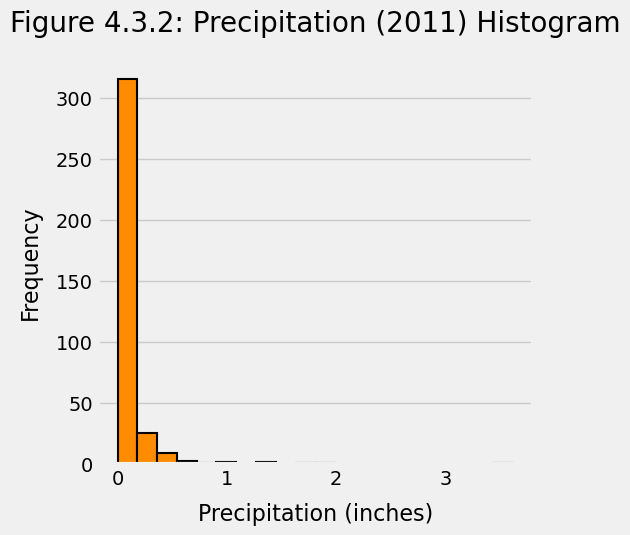

In [54]:
if 'precipitation' in precipitationDataFrameList[1].columns:

    subroutine \
        .DisplayHistogramFromSeries \
            (precipitationDataFrameList[1] \
                 ['precipitation'],
             'Figure 4.3.2: Precipitation (2011) Histogram',
             'Precipitation (inches)',
             'Frequency',
             colorStringParameter = 'darkorange',
             binsIntegerParameter = 20,
             figureWidthFloat = 5.0,
             figureHeightFloat = 5.0)
    
else:
    
    subroutine \
        .DisplayHistogramFromSeries \
            (precipitationDataFrameList[1] \
                 ['2011'],
             'Figure 4.3.2: Precipitation (2011) Histogram',
             'Precipitation (inches)',
             'Frequency',
             colorStringParameter = 'darkorange',
             binsIntegerParameter = 20,
             figureWidthFloat = 5.0,
             figureHeightFloat = 5.0)    

### **Summary Statistics**

In [55]:
captionString \
    = 'Table 4.3: Precipitation (2011) Summary Statistics'

if 'precipitation' in precipitationDataFrameList[1].columns:

    precipitationDataFrameList[1] \
        .rename \
            ({'precipitation': '2011'}, 
             axis = 1, 
             inplace = True)

currentStylerObject \
    = function \
        .ReturnFormattedStatisticsDataFrameFromSeries \
            (precipitationDataFrameList[1] \
                 ['2011'],
             captionString,
             columnNameString = 'precipitation')

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,precipitation
Mean,0.0909
Median,0.0050
Mode,0.0000
Variance,0.0786
Std Dev,0.2803
SEM,0.0147
Minimum,0.00
25%,0.00
50%,0.01
75%,0.08


## **4.4: Precipitation (2012)**

### **Display Precipitation vs. Time**

<Figure size 970.813x600 with 0 Axes>

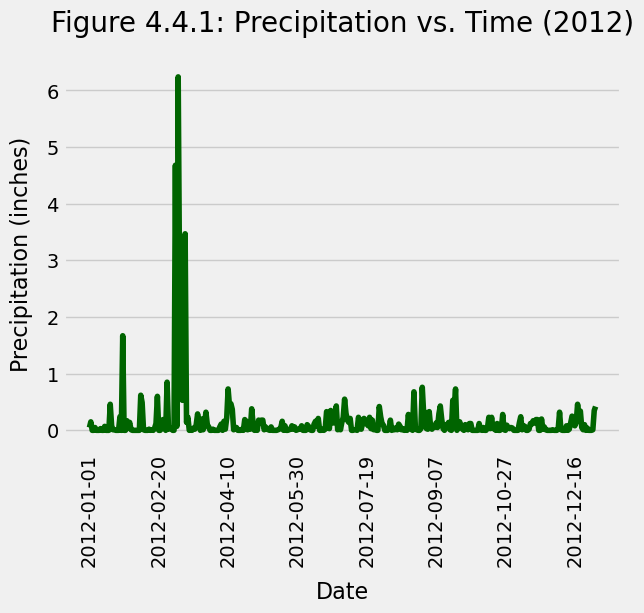

In [56]:
subroutine \
    .DisplayPlotFromDataFrame \
        (precipitationDataFrameList[2],
         colorString = 'darkgreen',
         captionString = 'Figure 4.4.1: Precipitation vs. Time (2012)',
         xLabelString = 'Date',
         yLabelString = 'Precipitation (inches)',
         figureWidthFloat = 5.0,
         figureHeightFloat = 5.0)

### **Histogram**

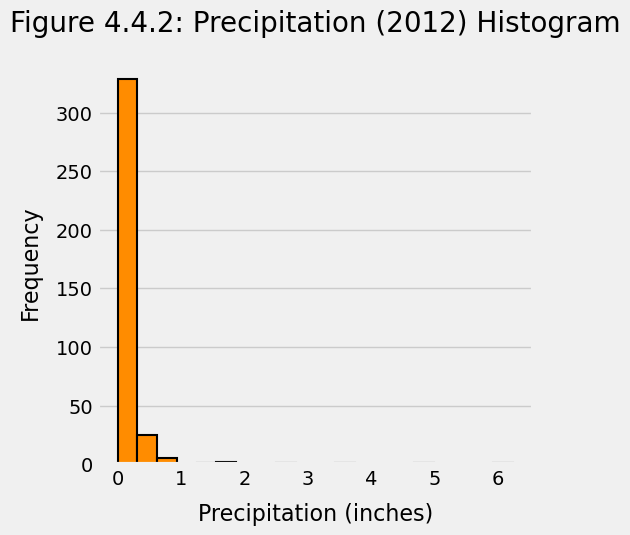

In [57]:
if 'precipitation' in precipitationDataFrameList[2].columns:

    subroutine \
        .DisplayHistogramFromSeries \
            (precipitationDataFrameList[2] \
                 ['precipitation'],
             'Figure 4.4.2: Precipitation (2012) Histogram',
             'Precipitation (inches)',
             'Frequency',
             colorStringParameter = 'darkorange',
             binsIntegerParameter = 20,
             figureWidthFloat = 5.0,
             figureHeightFloat = 5.0)
    
else:
    
    subroutine \
        .DisplayHistogramFromSeries \
            (precipitationDataFrameList[2] \
                 ['2012'],
             'Figure 4.4.2: Precipitation (2012) Histogram',
             'Precipitation (inches)',
             'Frequency',
             colorStringParameter = 'darkorange',
             binsIntegerParameter = 20,
             figureWidthFloat = 5.0,
             figureHeightFloat = 5.0)    

### **Summary Statistics**

In [58]:
captionString \
    = 'Table 4.4: Precipitation (2012) Summary Statistics'

if 'precipitation' in precipitationDataFrameList[2].columns:

    precipitationDataFrameList[2] \
        .rename \
            ({'precipitation': '2012'}, 
             axis = 1, 
             inplace = True)

currentStylerObject \
    = function \
        .ReturnFormattedStatisticsDataFrameFromSeries \
            (precipitationDataFrameList[2] \
                 ['2012'],
             captionString,
             columnNameString = 'precipitation')

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,precipitation
Mean,0.1500
Median,0.0300
Mode,0.0000
Variance,0.2453
Std Dev,0.4952
SEM,0.0259
Minimum,0.00
25%,0.00
50%,0.03
75%,0.14


## **4.5: Precipitation (2013)**

### **Display Precipitation vs. Time**

<Figure size 970.813x600 with 0 Axes>

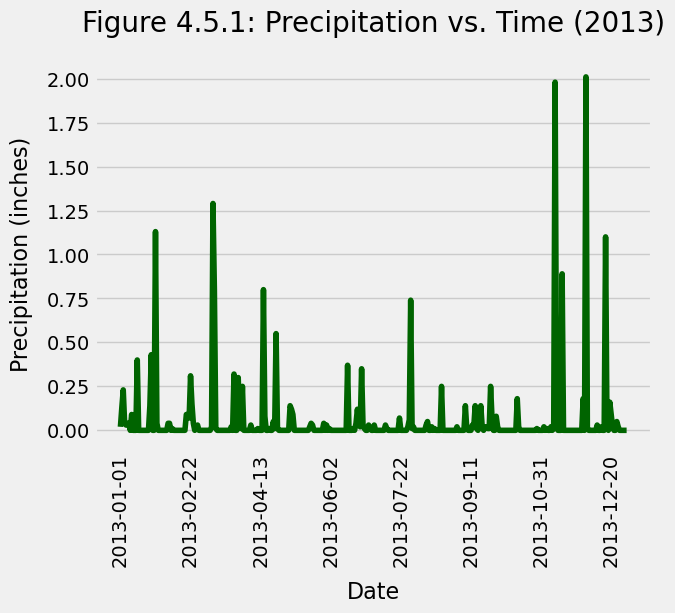

In [59]:
subroutine \
    .DisplayPlotFromDataFrame \
        (precipitationDataFrameList[3],
         colorString = 'darkgreen',
         captionString = 'Figure 4.5.1: Precipitation vs. Time (2013)',
         xLabelString = 'Date',
         yLabelString = 'Precipitation (inches)',
         figureWidthFloat = 5.0,
         figureHeightFloat = 5.0)

### **Histogram**

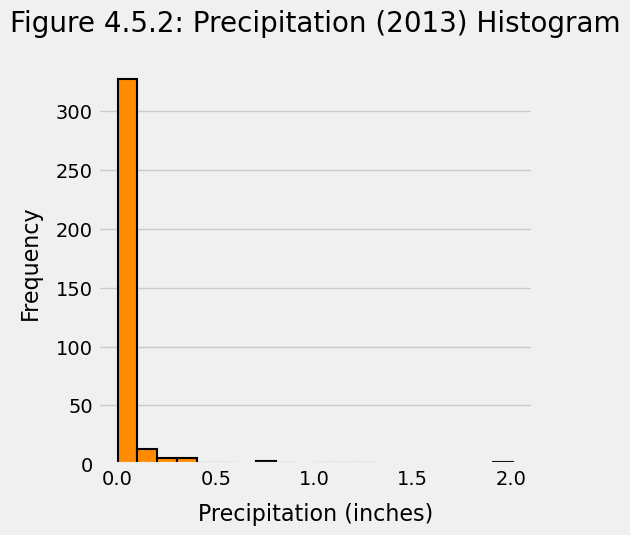

In [60]:
if 'precipitation' in precipitationDataFrameList[3].columns:

    subroutine \
        .DisplayHistogramFromSeries \
            (precipitationDataFrameList[3] \
                 ['precipitation'],
             'Figure 4.5.2: Precipitation (2013) Histogram',
             'Precipitation (inches)',
             'Frequency',
             colorStringParameter = 'darkorange',
             binsIntegerParameter = 20,
             figureWidthFloat = 5.0,
             figureHeightFloat = 5.0)
else:
    
    subroutine \
        .DisplayHistogramFromSeries \
            (precipitationDataFrameList[3] \
                 ['2013'],
             'Figure 4.5.2: Precipitation (2013) Histogram',
             'Precipitation (inches)',
             'Frequency',
             colorStringParameter = 'darkorange',
             binsIntegerParameter = 20,
             figureWidthFloat = 5.0,
             figureHeightFloat = 5.0)

### **Summary Statistics**

In [61]:
captionString \
    = 'Table 4.5: Precipitation (2013) Summary Statistics'

if 'precipitation' in precipitationDataFrameList[3].columns:

    precipitationDataFrameList[3] \
        .rename \
            ({'precipitation': '2013'}, 
             axis = 1, 
             inplace = True)

currentStylerObject \
    = function \
        .ReturnFormattedStatisticsDataFrameFromSeries \
            (precipitationDataFrameList[3] \
                 ['2013'],
             captionString,
             columnNameString = 'precipitation')

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,precipitation
Mean,0.0532
Median,0.0000
Mode,0.0000
Variance,0.0431
Std Dev,0.2076
SEM,0.0109
Minimum,0.00
25%,0.00
50%,0.00
75%,0.02


## **4.6: Precipitation (2014)**

### **Display Precipitation vs. Time**

<Figure size 970.813x600 with 0 Axes>

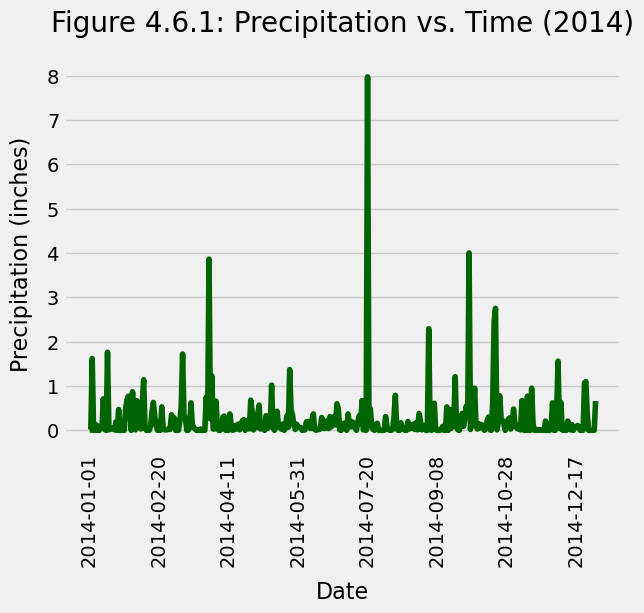

In [62]:
subroutine \
    .DisplayPlotFromDataFrame \
        (precipitationDataFrameList[4],
         colorString = 'darkgreen',
         captionString = 'Figure 4.6.1: Precipitation vs. Time (2014)',
         xLabelString = 'Date',
         yLabelString = 'Precipitation (inches)',
         figureWidthFloat = 5.0,
         figureHeightFloat = 5.0)

### **Histogram**

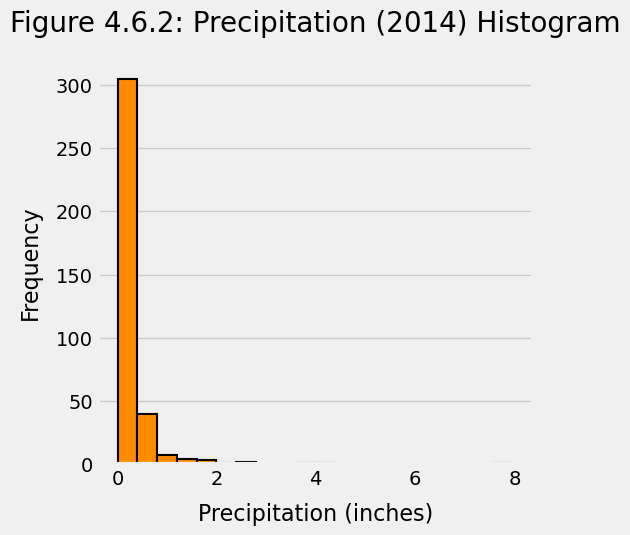

In [63]:
if 'precipitation' in precipitationDataFrameList[4].columns:

    subroutine \
        .DisplayHistogramFromSeries \
            (precipitationDataFrameList[4] \
                 ['precipitation'],
             'Figure 4.6.2: Precipitation (2014) Histogram',
             'Precipitation (inches)',
             'Frequency',
             colorStringParameter = 'darkorange',
             binsIntegerParameter = 20,
             figureWidthFloat = 5.0,
             figureHeightFloat = 5.0)
    
else:
    
    subroutine \
        .DisplayHistogramFromSeries \
            (precipitationDataFrameList[4] \
                 ['2014'],
             'Figure 4.6.2: Precipitation (2014) Histogram',
             'Precipitation (inches)',
             'Frequency',
             colorStringParameter = 'darkorange',
             binsIntegerParameter = 20,
             figureWidthFloat = 5.0,
             figureHeightFloat = 5.0)    

### **Summary Statistics**

In [64]:
captionString \
    = 'Table 4.6: Precipitation (2014) Summary Statistics'

if 'precipitation' in precipitationDataFrameList[4].columns:

    precipitationDataFrameList[4] \
        .rename \
            ({'precipitation': '2014'}, 
             axis = 1, 
             inplace = True)

currentStylerObject \
    = function \
        .ReturnFormattedStatisticsDataFrameFromSeries \
            (precipitationDataFrameList[4] \
                 ['2014'],
             captionString,
             columnNameString = 'precipitation')

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,precipitation
Mean,0.2462
Median,0.0700
Mode,0.0000
Variance,0.3678
Std Dev,0.6065
SEM,0.0317
Minimum,0.00
25%,0.00
50%,0.07
75%,0.26


## **4.7: Precipitation (2015)**

### **Display Precipitation vs. Time**

<Figure size 970.813x600 with 0 Axes>

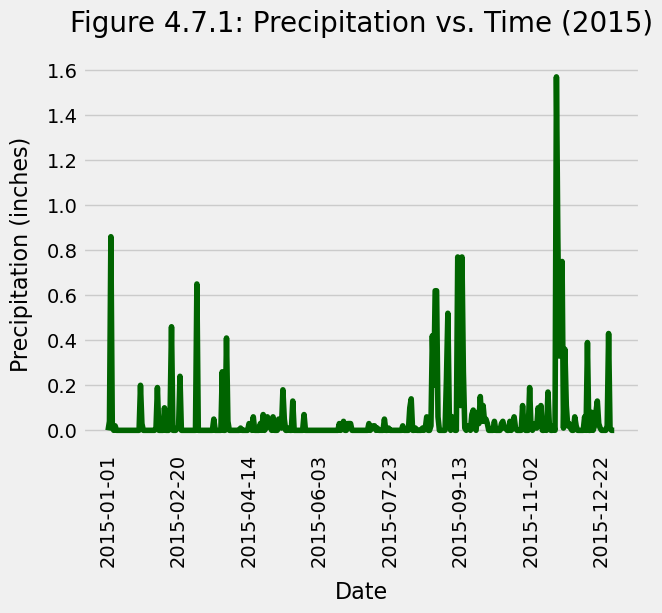

In [65]:
subroutine \
    .DisplayPlotFromDataFrame \
        (precipitationDataFrameList[5],
         colorString = 'darkgreen',
         captionString = 'Figure 4.7.1: Precipitation vs. Time (2015)',
         xLabelString = 'Date',
         yLabelString = 'Precipitation (inches)',
         figureWidthFloat = 5.0,
         figureHeightFloat = 5.0)

### **Histogram**

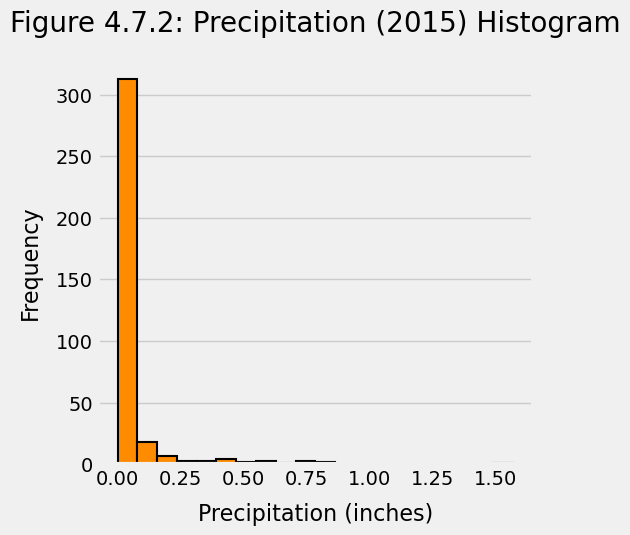

In [66]:
if 'precipitation' in precipitationDataFrameList[5].columns:

    subroutine \
        .DisplayHistogramFromSeries \
            (precipitationDataFrameList[5] \
                 ['precipitation'],
             'Figure 4.7.2: Precipitation (2015) Histogram',
             'Precipitation (inches)',
             'Frequency',
             colorStringParameter = 'darkorange',
             binsIntegerParameter = 20,
             figureWidthFloat = 5.0,
             figureHeightFloat = 5.0)

else:
    
    subroutine \
        .DisplayHistogramFromSeries \
            (precipitationDataFrameList[5] \
                 ['2015'],
             'Figure 4.7.2: Precipitation (2015) Histogram',
             'Precipitation (inches)',
             'Frequency',
             colorStringParameter = 'darkorange',
             binsIntegerParameter = 20,
             figureWidthFloat = 5.0,
             figureHeightFloat = 5.0)

### **Summary Statistics**

In [67]:
captionString \
    = 'Table 4.7: Precipitation (2015) Summary Statistics'

if 'precipitation' in precipitationDataFrameList[5].columns:

    precipitationDataFrameList[5] \
        .rename \
            ({'precipitation': '2015'}, 
             axis = 1, 
             inplace = True)

currentStylerObject \
    = function \
        .ReturnFormattedStatisticsDataFrameFromSeries \
            (precipitationDataFrameList[5] \
                 ['2015'],
             captionString,
             columnNameString = 'precipitation')

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,precipitation
Mean,0.0510
Median,0.0000
Mode,0.0000
Variance,0.0243
Std Dev,0.1559
SEM,0.0082
Minimum,0.00
25%,0.00
50%,0.00
75%,0.02


## **4.8: Precipitation (2016)**

### **Display Precipitation vs. Time**

<Figure size 970.813x600 with 0 Axes>

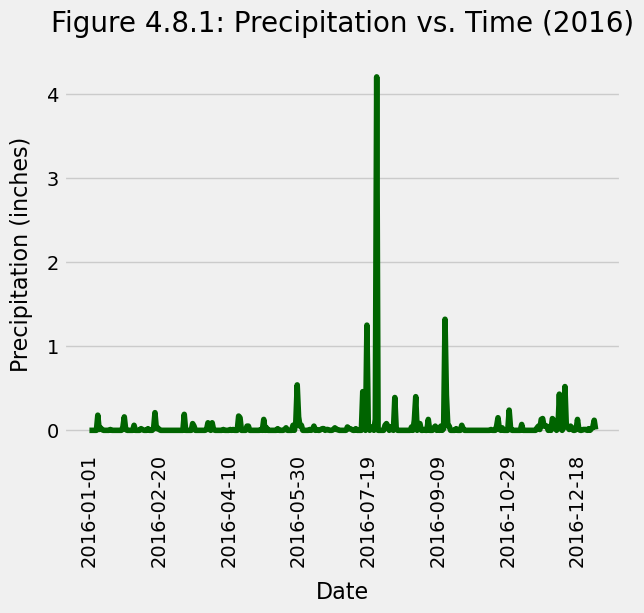

In [68]:
subroutine \
    .DisplayPlotFromDataFrame \
        (precipitationDataFrameList[6],
         colorString = 'darkgreen',
         captionString = 'Figure 4.8.1: Precipitation vs. Time (2016)',
         xLabelString = 'Date',
         yLabelString = 'Precipitation (inches)',
         figureWidthFloat = 5.0,
         figureHeightFloat = 5.0)

### **Histogram**

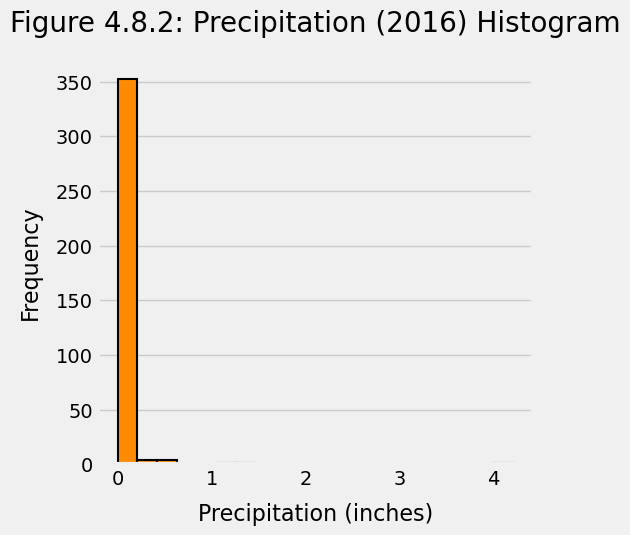

In [69]:
if 'precipitation' in precipitationDataFrameList[6].columns:

    subroutine \
        .DisplayHistogramFromSeries \
            (precipitationDataFrameList[6] \
                 ['precipitation'],
             'Figure 4.8.2: Precipitation (2016) Histogram',
             'Precipitation (inches)',
             'Frequency',
             colorStringParameter = 'darkorange',
             binsIntegerParameter = 20,
             figureWidthFloat = 5.0,
             figureHeightFloat = 5.0)
    
else:
    
    subroutine \
        .DisplayHistogramFromSeries \
            (precipitationDataFrameList[6] \
                 ['2016'],
             'Figure 4.8.2: Precipitation (2016) Histogram',
             'Precipitation (inches)',
             'Frequency',
             colorStringParameter = 'darkorange',
             binsIntegerParameter = 20,
             figureWidthFloat = 5.0,
             figureHeightFloat = 5.0)    

### **Summary Statistics**

In [70]:
captionString \
    = 'Table 4.8: Precipitation (2016) Summary Statistics'

if 'precipitation' in precipitationDataFrameList[6].columns:

    precipitationDataFrameList[6] \
        .rename \
            ({'precipitation': '2016'}, 
             axis = 1, 
             inplace = True)

currentStylerObject \
    = function \
        .ReturnFormattedStatisticsDataFrameFromSeries \
            (precipitationDataFrameList[6] \
                 ['2016'],
             captionString,
             columnNameString = 'precipitation')

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,precipitation
Mean,0.0444
Median,0.0000
Mode,0.0000
Variance,0.0614
Std Dev,0.2478
SEM,0.0130
Minimum,0.00
25%,0.00
50%,0.00
75%,0.02


## **4.9: Precipitation (2017 - 8 Months)**

### **Display Precipitation vs. Time**

<Figure size 970.813x600 with 0 Axes>

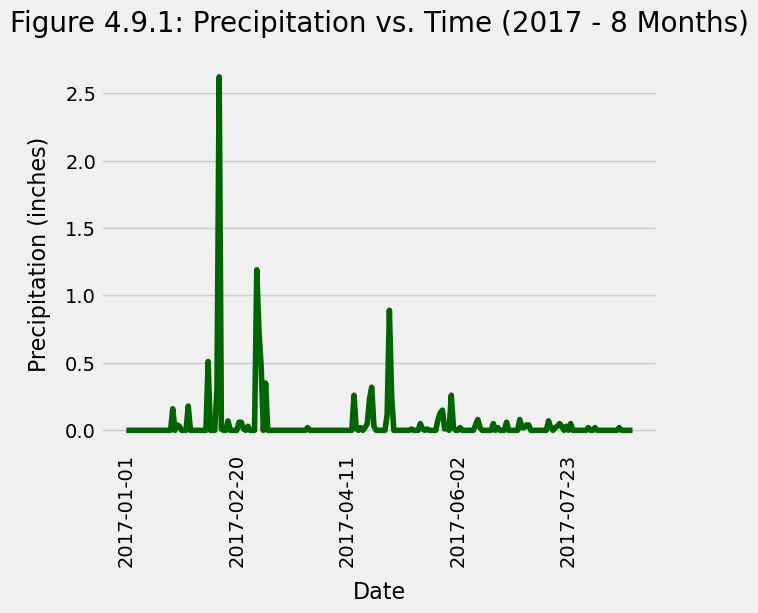

In [71]:
subroutine \
    .DisplayPlotFromDataFrame \
        (precipitationDataFrameList[7],
         colorString = 'darkgreen',
         captionString = 'Figure 4.9.1: Precipitation vs. Time (2017 - 8 Months)',
         xLabelString = 'Date',
         yLabelString = 'Precipitation (inches)',
         figureWidthFloat = 5.0,
         figureHeightFloat = 5.0)

### **Histogram**

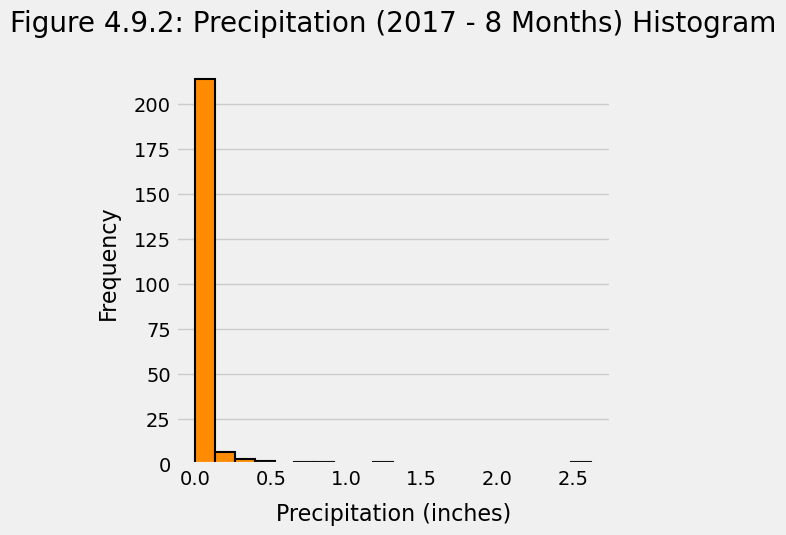

In [72]:
if 'precipitation' in precipitationDataFrameList[7].columns:

    subroutine \
        .DisplayHistogramFromSeries \
            (precipitationDataFrameList[7] \
                 ['precipitation'],
             'Figure 4.9.2: Precipitation (2017 - 8 Months) Histogram',
             'Precipitation (inches)',
             'Frequency',
             colorStringParameter = 'darkorange',
             binsIntegerParameter = 20,
             figureWidthFloat = 5.0,
             figureHeightFloat = 5.0)
    
else:
    
    subroutine \
        .DisplayHistogramFromSeries \
            (precipitationDataFrameList[7] \
                 ['2017*'],
             'Figure 4.9.2: Precipitation (2017 - 8 Months) Histogram',
             'Precipitation (inches)',
             'Frequency',
             colorStringParameter = 'darkorange',
             binsIntegerParameter = 20,
             figureWidthFloat = 5.0,
             figureHeightFloat = 5.0)

### **Summary Statistics**

In [73]:
captionString \
    = 'Table 4.9: Precipitation (2017 - 8 Months) Summary Statistics'

if 'precipitation' in precipitationDataFrameList[7].columns:

    precipitationDataFrameList[7] \
        .rename \
            ({'precipitation': '2017*'}, 
             axis = 1, 
             inplace = True)

currentStylerObject \
    = function \
        .ReturnFormattedStatisticsDataFrameFromSeries \
            (precipitationDataFrameList[7] \
                 ['2017*'],
             captionString,
             columnNameString = 'precipitation')

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,precipitation
Mean,0.0463
Median,0.0000
Mode,0.0000
Variance,0.0452
Std Dev,0.2126
SEM,0.0140
Minimum,0.00
25%,0.00
50%,0.00
75%,0.01


## **4.10: Precipitation (2010-2017)**

### **Display Precipitation vs. Time**

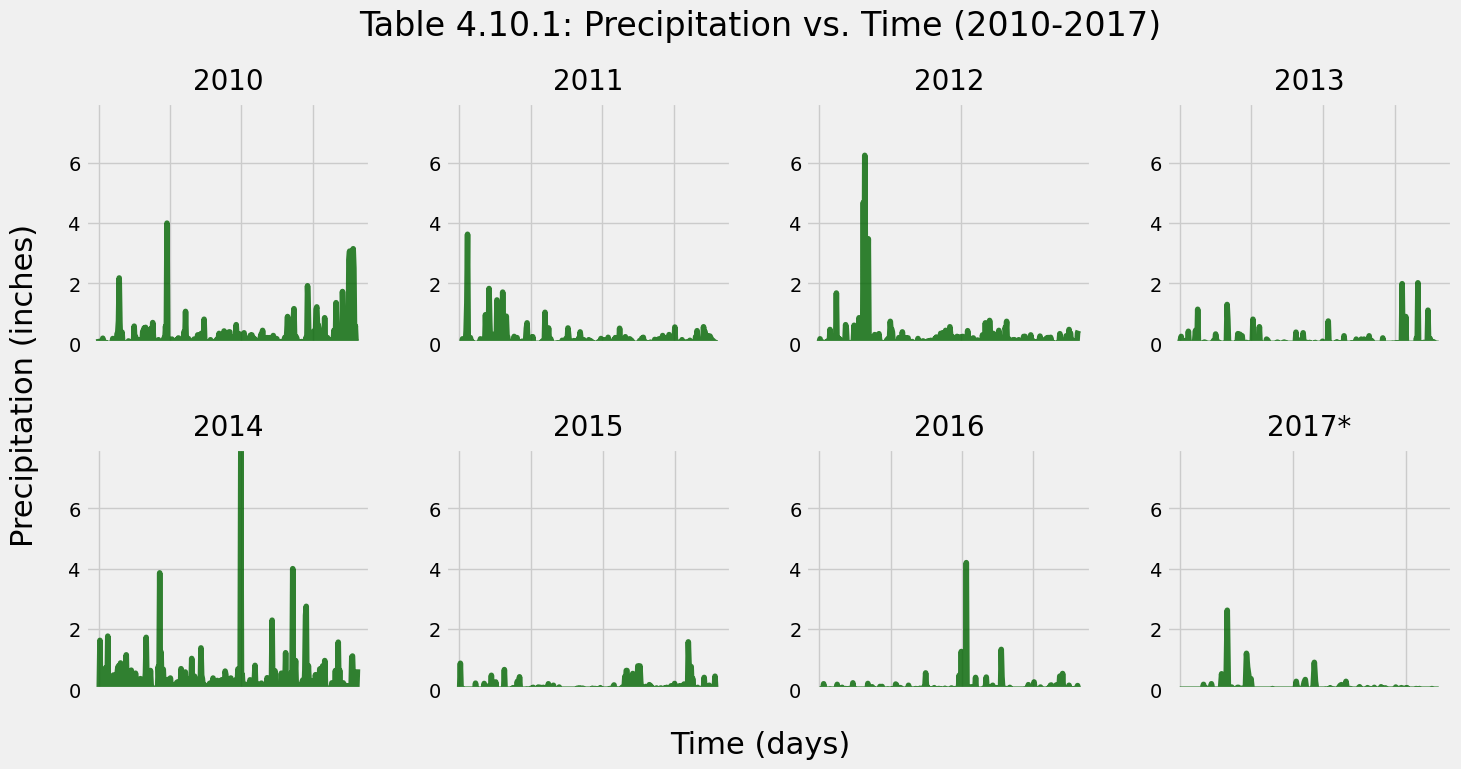

In [74]:
subroutine \
    .DisplayTwoByFourPlotsFromDataFrameList \
        (precipitationDataFrameList,
         keyStringList,
         figureTitleString = 'Table 4.10.1: Precipitation vs. Time (2010-2017)',
         figureXLabelString = 'Time (days)',
         figureXLabelFontSizeFloat = 22.0,
         figureXLabelPadFloat = 0.0,
         figureYLabelString = 'Precipitation (inches)',
         colorStringList = ['darkgreen'],
         plotTitleStringList = keyStringList,
         normalizeYAxisBoolean = True)

### **Histogram**

[0.0, 353]


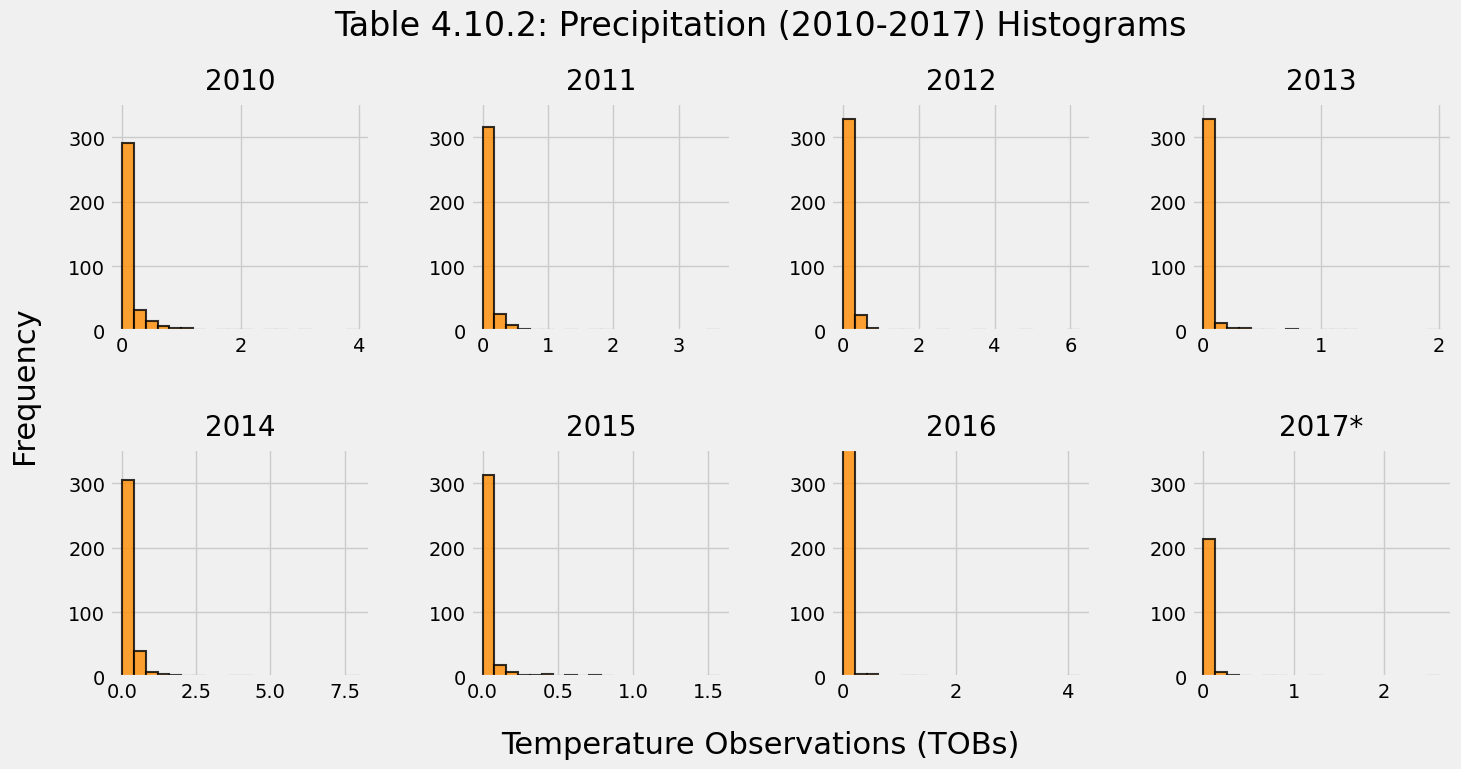

In [75]:
subroutine \
    .DisplayTwoByFourHistogramsFromDataFrameList \
        (precipitationDataFrameList,
         keyStringList,
         figureTitleString \
            = 'Table 4.10.2: Precipitation (2010-2017) Histograms',
         figureTitleYPadFloat = 1.0,
         figureXLabelPadFloat = 0.0,
         figureYLabelPadFloat = 0.0,
         figureXLabelString = 'Temperature Observations (TOBs)',
         figureYLabelString = 'Frequency',
         plotTitleStringList = keyStringList,
         colorStringList = ['darkorange'],
         binsInteger = 20,
         normalizeYAxisBoolean = True,
         normalizeYAxisHighestValueCountBoolean = False,
         figSizeFloatTuple = (15.0, 7.5))

### **Box Plot**

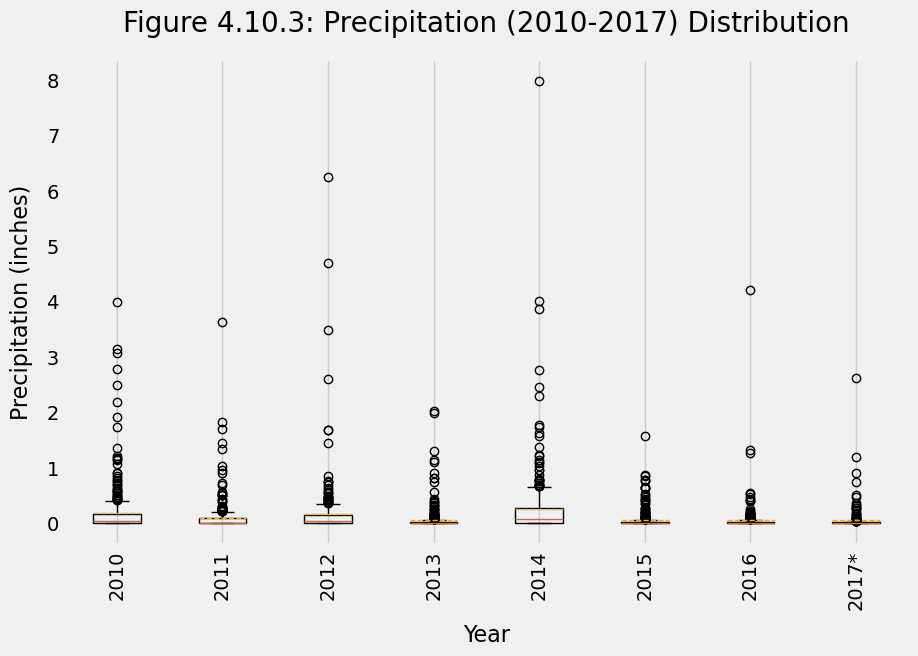

In [76]:
precipitationSeriesList \
    = []

for index, dataFrameObject in enumerate(precipitationDataFrameList):
    
    precipitationSeriesList \
        .append \
            (dataFrameObject \
                 [keyStringList[index]])

subroutine \
    .DisplayMatplotlibBoxPlotFromSeriesList \
        (precipitationSeriesList,
         keyStringList,
         'Year',
         'Precipitation (inches)',
         'Figure 4.10.3: Precipitation (2010-2017) Distribution',
         xTicksRotationFloat = 90.0)

### **Summary Statistics**

In [77]:
captionString \
    = 'Table 4.10.1: Temperature Observations (TOBs) (2010-2017) Summary Statistics'

currentStylerObject \
    = function \
        .ReturnFormattedStatisticsDataFrameFromDataFrameList \
            (precipitationDataFrameList,
             keyStringList,
             captionString)

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,2010,2011,2012,2013,2014,2015,2016,2017*
Mean,0.1805,0.0909,0.1500,0.0532,0.2462,0.0510,0.0444,0.0463
Median,0.0250,0.0050,0.0300,0.0000,0.0700,0.0000,0.0000,0.0000
Mode,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Variance,0.1962,0.0786,0.2453,0.0431,0.3678,0.0243,0.0614,0.0452
Std Dev,0.4429,0.2803,0.4952,0.2076,0.6065,0.1559,0.2478,0.2126
SEM,0.0232,0.0147,0.0259,0.0109,0.0317,0.0082,0.0130,0.0140
Minimum,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.03,0.01,0.03,0.00,0.07,0.00,0.00,0.00
75%,0.16,0.08,0.14,0.02,0.26,0.02,0.02,0.01


### **Correlation Matrix**

In [78]:
normalizedPrecipitationDataFrame \
    = function \
        .ReturnNormalizedDataFrameFromIndex \
            (precipitationDataFrameList,
             '2017*')

captionString \
    = 'Table 4.10.2: Temperature Observations (TOBs) ' \
      + '(2010-2016) Correlation Matrix'

currentStylerObject \
    = function \
        .ReturnCorrelationTableStandardFormat \
            (normalizedPrecipitationDataFrame,
             captionString)

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,2010,2011,2012,2013,2014,2015,2016
2010,1.000000,0.046267,0.013722,0.001086,0.010600,-0.051480,-0.018439
2011,0.046267,1.000000,0.040860,0.012862,-0.022005,-0.060752,-0.015696
2012,0.013722,0.040860,1.000000,0.114302,0.005252,0.092230,-0.013616
2013,0.001086,0.012862,0.114302,1.000000,-0.015433,-0.033670,-0.023081
2014,0.010600,-0.022005,0.005252,-0.015433,1.000000,-0.020597,-0.037474
2015,-0.051480,-0.060752,0.092230,-0.033670,-0.020597,1.000000,0.061961
2016,-0.018439,-0.015696,-0.013616,-0.023081,-0.037474,0.061961,1.000000


## **4.11: Total Precipitation (2010-2017)**

### **Calculations**

In [79]:
totalPrecipitationDataFrame \
    = pd \
        .DataFrame \
        .from_dict \
            (totalPrecipitationDictionary, 
             orient = 'index',
             columns = ['precipitation'])


log_function \
    .DebugReturnObjectWriteObject \
        (totalPrecipitationDataFrame)

### **Display Total Precipitation vs. Year**

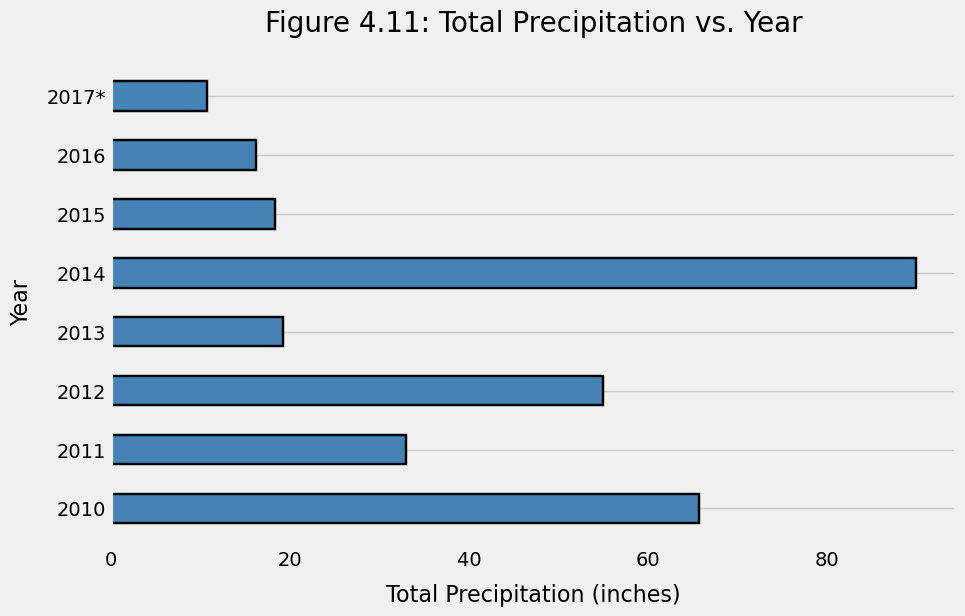

In [80]:
subroutine \
    .DisplayHorizontalBarChartFromXYLists \
        (totalPrecipitationDataFrame['precipitation'].tolist(),
         totalPrecipitationDataFrame.index.tolist(),
         barColorsList = 'steelblue',
         captionString = 'Figure 4.11: Total Precipitation vs. Year',
         xLabelString = 'Total Precipitation (inches)',
         yLabelString = 'Year')

In [81]:
captionString \
    = 'Table 4.11.1: Total Precipitation vs. Time (2010-2017)'

currentStylerObject \
    = function \
        .ReturnStylerObjectStandardFormat \
            (totalPrecipitationDataFrame, 
             captionString,
             hideFlagBooleanParameter = False)

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,precipitation
2010,65.69
2011,32.90
2012,54.90
2013,19.25
2014,89.85
2015,18.36
2016,16.15
2017*,10.66


### **Summary Statistics**

In [82]:
captionString \
    = 'Table 4.11.2: Total Precipitation (2010-2017) Summary Statistics'

currentStylerObject \
    = function \
        .ReturnFormattedStatisticsDataFrameFromSeries \
            (totalPrecipitationDataFrame['precipitation'],
             captionString,
             columnNameString = 'precipitation')

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,precipitation
Mean,38.4700
Median,26.0750
Mode,10.6600
Variance,818.1717
Std Dev,28.6037
SEM,10.1129
Minimum,10.66
25%,17.81
50%,26.07
75%,57.60


# Section 5: Close Session

In [83]:
sessionSQLAlchemySessionObject \
    .close()

In [84]:
#log_subroutine \
#    .EndProgramExecution()